<a href="https://colab.research.google.com/github/yesolYoon/covid19airtraffic/blob/main/covid19AirTraffic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
%matplotlib inline
sns.set()

# Import Data

In [122]:
data = pd.read_csv('covid_impact_on_airport_traffic.csv')

In [61]:
data.head()

,AggregationMethod,Date,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography
0,Daily,2020-04-03,1.0,Kingsford Smith,64,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
1,Daily,2020-04-13,1.0,Kingsford Smith,29,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
2,Daily,2020-07-10,1.0,Kingsford Smith,54,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
3,Daily,2020-09-02,1.0,Kingsford Smith,18,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
4,Daily,2020-10-31,1.0,Kingsford Smith,22,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."


In [62]:
data.describe(include = 'all')

,AggregationMethod,Date,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography
count,7247,7247,7247.0,7247,7247.000000,7247,7247,7247,7247,7247,7247
unique,1,262,NaN,28,NaN,28,27,23,23,4,28
top,Daily,2020-05-22,NaN,Los Angeles International,NaN,POINT(-73.7424121584688 45.4678436940192),New York,California,US-CA,United States of America (the),"POLYGON((-84.4299745559692 33.657852680999, -8..."
freq,7247,28,NaN,262,NaN,262,523,523,523,4441,262
mean,NaN,NaN,1.0,NaN,66.651442,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.0,NaN,22.134433,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,1.0,NaN,53.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,1.0,NaN,67.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,1.0,NaN,84.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7247 entries, 0 to 7246
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AggregationMethod  7247 non-null   object 
 1   Date               7247 non-null   object 
 2   Version            7247 non-null   float64
 3   AirportName        7247 non-null   object 
 4   PercentOfBaseline  7247 non-null   int64  
 5   Centroid           7247 non-null   object 
 6   City               7247 non-null   object 
 7   State              7247 non-null   object 
 8   ISO_3166_2         7247 non-null   object 
 9   Country            7247 non-null   object 
 10  Geography          7247 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 622.9+ KB


# Data Preprocessing

In [123]:
data['Date']    = pd.to_datetime(data['Date'])
data['Country'] = data['Country'].replace({'United States of America (the)':'USA'})
data['Country_Airport'] = data['Country'] + ' - ' + data['AirportName']
data['AirportName'] = data.AirportName.astype('category')
data['State'] = data.Country.astype('category')
data['Country'] = data.Country.astype('category')
data['Country_Airport'] = data.Country_Airport.astype('category')

data.drop(['AggregationMethod', 'Version'], axis = 1, inplace = True)

# Plot 1: world map
 - Check the location of airports
 - Most of the airports locate in North America

In [65]:
data['long'] = data['Centroid'].apply(lambda x: x[6:-1].split(' ')[0])
data['lat']  = data['Centroid'].apply(lambda x: x[6:-1].split(' ')[1])

In [66]:
airportLoc = data[['AirportName', 'long', 'lat']].drop_duplicates()

world_map= folium.Map(tiles="cartodbpositron")

for i in range(len(airportLoc)):
    lat = airportLoc.iloc[i]['lat']
    long = airportLoc.iloc[i]['long']
    name = airportLoc.iloc[i]['AirportName']
    radius=5
    folium.Marker(location=[lat,long], icon=folium.Icon(icon_color='white',icon ='plane',prefix='fa'),
                 popup    = name).add_to(world_map)

world_map

# Plot 2: avg. perc by calendar week

In [124]:
data['Week'] = data['Date'].apply(lambda x: x.weekofyear)
week_agg = data.groupby(['Country_Airport', 'Week'], as_index = False)[['PercentOfBaseline']].mean()

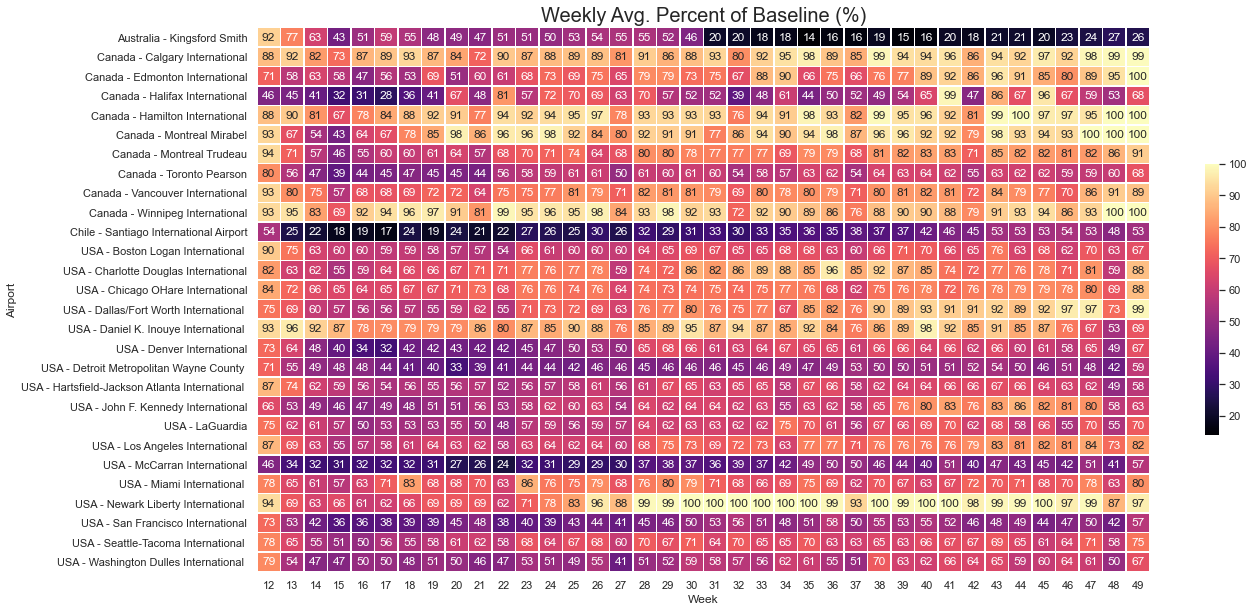

In [128]:
week_agg_matrix = week_agg.pivot('Country_Airport', 'Week', 'PercentOfBaseline')

fig = plt.figure(figsize=(20,10))
r = sns.heatmap(week_agg_matrix, cmap = 'magma', linewidths = 0.5, cbar_kws = {'shrink':0.5}, fmt = '.0f', annot=True)
r.set_title("Weekly Avg. Percent of Baseline (%)", fontdict = {'size': 20})
plt.ylabel('Airport')
plt.show()

# Plot 3: avg. perc by country

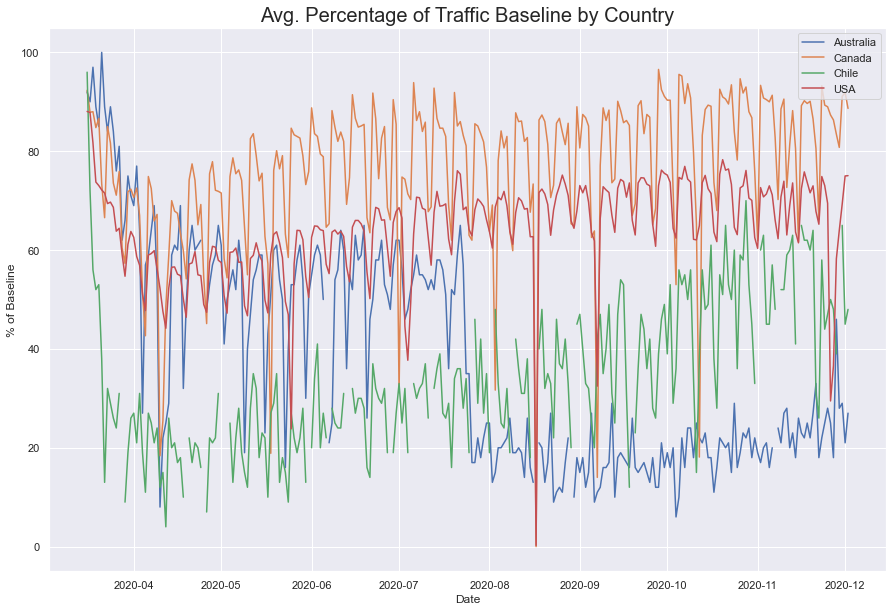

In [8]:
daily_agg = data.groupby(['Country', 'Date'], as_index = False)[['PercentOfBaseline']].mean()

legends = list()
plt.figure(figsize=(15,10))
for a_country in data.Country.cat.categories:
  data_a_country = daily_agg[daily_agg['Country'] == a_country]
  plt.plot(data_a_country.Date, data_a_country.PercentOfBaseline)
  legends.append(a_country)
plt.legend(legends, loc = 'upper right')
plt.xlabel('Date')
plt.ylabel('% of Baseline')
plt.title('Avg. Percentage of Traffic Baseline by Country', fontdict={'size':20})
plt.show()